#Ablation Study: 1D causal layer into proposed TS-CausalNN Model (Arctic Sea Ice dataset)


This notebook contains the proposed TS-CausalNN model with 1D custom calsal. We have developed the proposed Causal 1D layer to analyse the effectiveness of our proposed Causal Conv2D layer.
  

In this notebook, we applied the ablation 1D model to the Arctic Sea Ice dataset to generate a full causal graph and summary graph.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
!pip install cdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=e145ba8e4dd65d97ce6a17f1acb900820b160d44f3216702c3675a7619b886a0
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=ddc3ffd8a84b89b3e38a11788219168dd623a58861c63e36621e0587e2df2f41
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [ ]:
df_2D_data_sea_ice = pd.read_csv('/content/combined_drop_temp_all_1980_2018.csv')
#df_2D_data_TKE = df_2D_data_TKE.drop('Date', axis=1)
df_2D_data_sea_ice

,Surface sensible+latent heat flux (Wm**-2),Surface downwelling shortwave flux (Wm**-2),Surface downwelling longwave flux (Wm**-2),Sea level pressure (hPa),Total precipitation (mm/day),Relative humidity averaged 1000-300hPa (%),U wind at 10 m (m s**-1),V wind at 10 m (m s**-1),TotalArc,Total cloud cover (%),Total column cloud water (g m**-2),GH_mean
0,-14.515746,3.397134,188.566474,1019.807404,0.858821,72.950740,-0.309648,-0.308690,15053607.0,84.543343,39.070621,5880.449752
1,-11.155385,18.953971,194.381967,1013.952864,0.831777,73.521670,0.717918,0.132610,16074814.0,83.167001,39.984280,5861.477613
2,-15.824442,71.869876,197.269891,1018.900662,0.669739,74.499365,-0.218005,-0.229795,16207072.0,81.490186,34.143657,5912.337135
3,-24.116219,159.062774,216.452459,1016.864319,0.776846,71.982550,-0.188627,-0.334186,15546525.0,79.284692,41.757531,5984.780309
4,-31.230077,225.084615,260.700879,1017.970033,0.840839,68.851454,-1.038648,-0.611375,14080852.0,80.420287,63.752542,6128.435629
...,...,...,...,...,...,...,...,...,...,...,...,...
463,-33.515496,128.156161,308.955178,1008.433874,1.693416,71.542345,0.380871,-0.040807,5622998.0,81.062949,119.973755,6218.951904
464,-26.828923,71.000427,283.720978,1011.229922,1.571682,72.186382,0.590761,0.050951,4834953.0,79.328931,94.030741,6134.249281
465,-25.604347,25.377637,257.384245,1009.500666,1.431546,74.109000,0.275876,-0.000186,6824601.0,81.066008,71.868710,6017.538401
466,-22.480758,5.405305,221.224509,1015.854419,1.062975,73.686454,-0.279709,-0.266170,10279618.0,84.034796,56.764820,5948.270480


In [ ]:
df_2D_data_sea_ice.columns

Index(['Surface sensible+latent heat flux (Wm**-2)',
       'Surface downwelling shortwave flux (Wm**-2)',
       'Surface downwelling longwave flux (Wm**-2)',
       'Sea level pressure (hPa)', 'Total precipitation (mm/day)',
       'Relative humidity averaged 1000-300hPa (%)',
       'U wind at 10 m (m s**-1)', 'V wind at 10 m (m s**-1)', 'TotalArc',
       'Total cloud cover (%)', 'Total column cloud water (g m**-2)',
       'GH_mean'],
      dtype='object')

In [ ]:
df_2D_data_sea_ice.columns = ['HFLX','SW','LW','SLP', 'PRE','RH','U10m', 'V10m', 'ICE', 'CC', 'CW','GH']
df_2D_data_sea_ice = df_2D_data_sea_ice[['HFLX','CC','SW','U10m','SLP', 'PRE','ICE', 'LW','V10m','CW','GH','RH']]

In [ ]:
df_2D_data_sea_ice.columns

Index(['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW',
       'GH', 'RH'],
      dtype='object')

In [ ]:
df_2D_data_sea_ice.isnull().sum().sum()

0

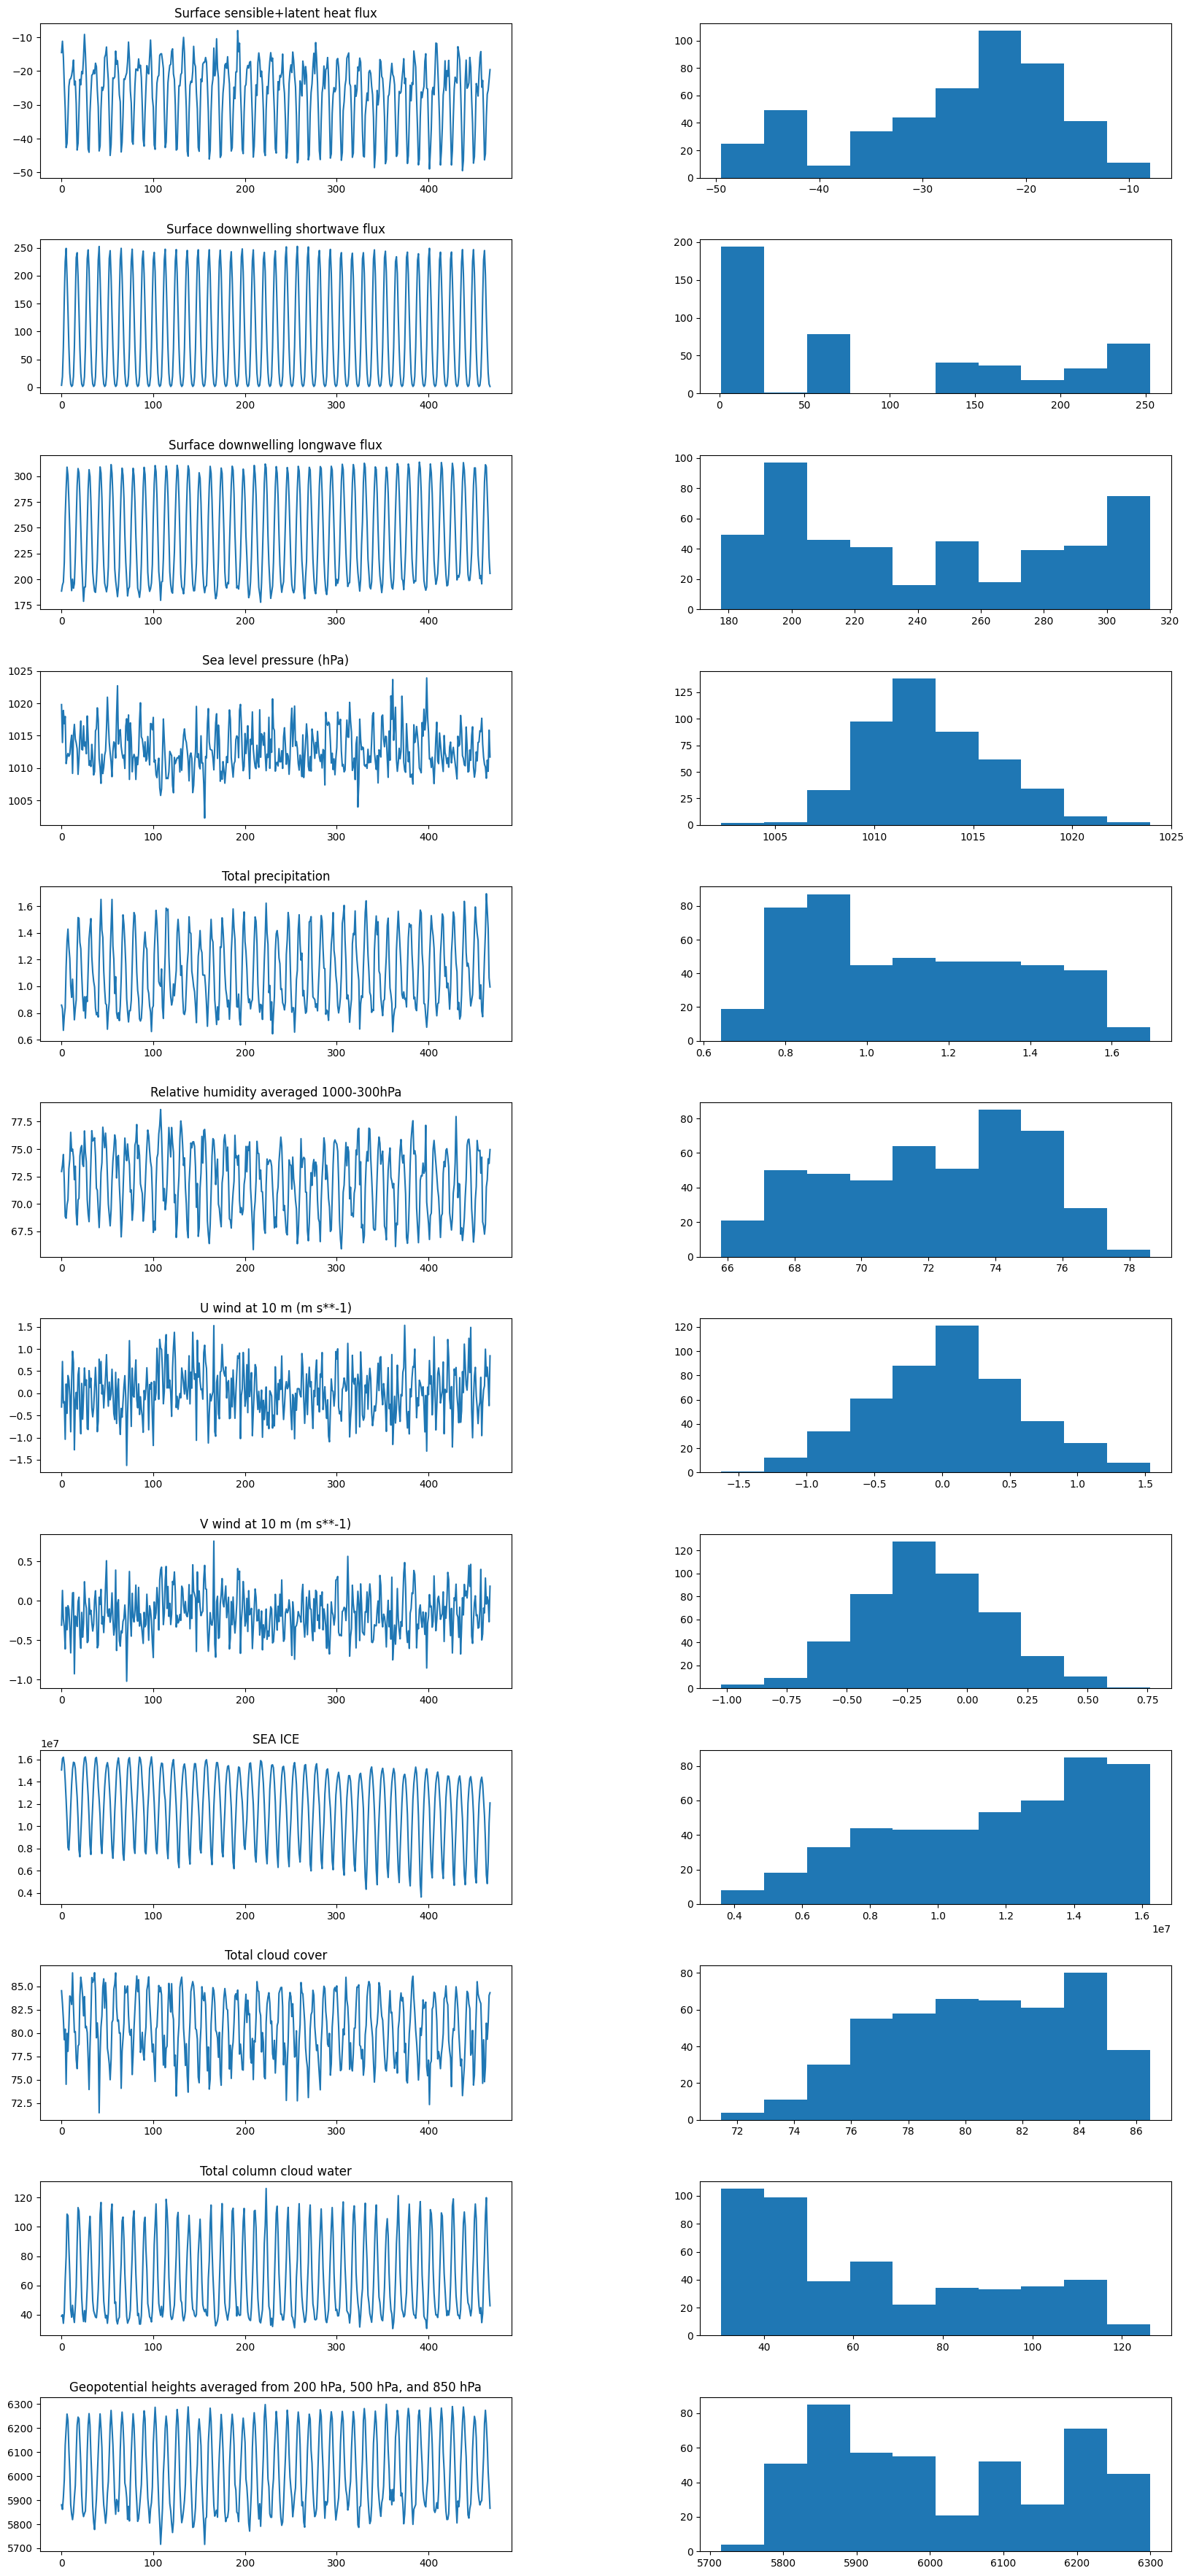

In [ ]:
from matplotlib import pyplot
series_HFLX = df_2D_data_sea_ice['HFLX']
series_SW = df_2D_data_sea_ice['SW']
series_LW = df_2D_data_sea_ice['LW']
series_SLP = df_2D_data_sea_ice['SLP']
series_PRE = df_2D_data_sea_ice['PRE']
series_RH = df_2D_data_sea_ice['RH']
series_U10m = df_2D_data_sea_ice['U10m']
series_V10m = df_2D_data_sea_ice['V10m']
series_ICE = df_2D_data_sea_ice['ICE']
series_CC = df_2D_data_sea_ice['CC']
series_CW = df_2D_data_sea_ice['CW']
series_GH = df_2D_data_sea_ice['GH']



fig, ax = pyplot.subplots(nrows=12, ncols=2, figsize=(20, 45),
                       gridspec_kw={
                       'wspace': 0.4,
                       'hspace': 0.4})

# line plot and histogram
ax[0][0].plot(series_HFLX)
ax[0][0].set_title('Surface sensible+latent heat flux')
ax[0][1].hist(series_HFLX)

ax[1][0].plot(series_SW)
ax[1][0].set_title('Surface downwelling shortwave flux')
ax[1][1].hist(series_SW)

ax[2][0].plot(series_LW)
ax[2][0].set_title('Surface downwelling longwave flux')
ax[2][1].hist(series_LW)

ax[3][0].plot(series_SLP)
ax[3][0].set_title('Sea level pressure (hPa)')
ax[3][1].hist(series_SLP)

ax[4][0].plot(series_PRE)
ax[4][0].set_title('Total precipitation')
ax[4][1].hist(series_PRE)

ax[5][0].plot(series_RH)
ax[5][0].set_title('Relative humidity averaged 1000-300hPa')
ax[5][1].hist(series_RH)

ax[6][0].plot(series_U10m)
ax[6][0].set_title('U wind at 10 m (m s**-1)')
ax[6][1].hist(series_U10m)

ax[7][0].plot(series_V10m)
ax[7][0].set_title('V wind at 10 m (m s**-1)')
ax[7][1].hist(series_V10m)

ax[8][0].plot(series_ICE)
ax[8][0].set_title('SEA ICE')
ax[8][1].hist(series_ICE)

ax[9][0].plot(series_CC)
ax[9][0].set_title('Total cloud cover')
ax[9][1].hist(series_CC)

ax[10][0].plot(series_CW)
ax[10][0].set_title('Total column cloud water')
ax[10][1].hist(series_CW)

ax[11][0].plot(series_GH)
ax[11][0].set_title('Geopotential heights averaged from 200 hPa, 500 hPa, and 850 hPa')
ax[11][1].hist(series_GH)


pyplot.show()

#Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd

def data_preprocessing(data, max_lag=5):
  from sklearn.preprocessing import MinMaxScaler

  #convert to numpy array
  syn_data_np = data.to_numpy()

  #normalize the dataset
  scaler_X = MinMaxScaler(feature_range=(0, 1))
  syn_data_np_nor = scaler_X.fit_transform(syn_data_np)
  syn_data_np = syn_data_np_nor

  #transform into 2D data
  syn_data_np_T= syn_data_np.T
  syn_data_pro = np.zeros((syn_data_np.shape[0]-max_lag,syn_data_np.shape[1],(max_lag+1)))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    syn_data_pro[i,:,:]= syn_data_np_T[:, i:i+(max_lag+1)]
  syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)

  #make datafrom with normalized data
  syn_data_nor_df =pd.DataFrame(data = syn_data_np,
                  columns = data.columns)

  #transform normalized data into 1D shape with lagged and current time values
  size_1d = syn_data_np.shape[1]*(max_lag+1)
  print(size_1d)
  syn_data_1d = np.zeros((syn_data_np.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np.shape[1]
      syn_data_1d[i,j_end:j_end+syn_data_np.shape[1]]= syn_data_np[i+j, :]

  #transform non-normalized data into 1D shape with lagged and current time values
  syn_data_np_2 = data.to_numpy()
  syn_data_1d_not_norm = np.zeros((syn_data_np_2.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np_2.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np_2.shape[1]
      syn_data_1d_not_norm[i,j_end:j_end+syn_data_np_2.shape[1]]= syn_data_np_2[i+j, :]


  return syn_data_np_nor, syn_data_2d, syn_data_nor_df, syn_data_1d,  syn_data_1d_not_norm

In [ ]:
SEA_ICE_np_nor, SEA_ICE_2d, SEA_ICE_nor_df, SEA_ICE_1d, SEA_ICE_1d_not_norm = data_preprocessing(df_2D_data_sea_ice, max_lag=12)

156


In [ ]:
SEA_ICE_np_nor.shape, SEA_ICE_2d.shape, SEA_ICE_nor_df.shape

((468, 12), (456, 12, 13, 1), (468, 12))

In [ ]:
data_y_SEA_ICE = SEA_ICE_np_nor[12:,:]
data_y_SEA_ICE.shape

(456, 12)

# Ablation TS-CausalNN Model with 1D Causal Layer

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AveragePooling2D, LSTM, Activation, ConvLSTM2D, TimeDistributed, Input, Reshape
from keras.layers import UpSampling1D, Conv2DTranspose, UpSampling2D, Conv1D, AveragePooling1D, LeakyReLU
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
import keras.backend as K
import tensorflow as tf
from keras.layers import concatenate
from keras.regularizers import l1, l2
from time import time

keras.utils.set_random_seed(1001)

In [ ]:
class CausalDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs, counter, **kwargs):
    super(CausalDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    self.counter = counter
    #self.name1=name1

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]), self.num_outputs],
                                  initializer = tf.keras.initializers.glorot_uniform(seed=8),
                                  trainable=True)
    self.mask = np.ones(shape=self.kernel.shape)
    self.mask[-self.counter, ...] = 0.0
    #self.kernel(self.kernel * self.mask)

  def get_weights(self):
     return super().get_weights()

  def call(self, inputs):
    self.kernel.assign(self.kernel * self.mask)
    #return tf.matmul(inputs, self.kernel)
    return tf.keras.activations.tanh(tf.matmul(inputs, self.kernel))


In [ ]:
def get_model(input_dims):
    input_batch = Input(shape = input_dims)

    conv_model = Sequential()
    conv_model = Conv2D(filters=4, kernel_size=1, strides=(1,1), padding='valid', activation="linear", name='conv1')(input_batch)
    conv_model = tf.math.reduce_mean(conv_model, axis=-1)
    conv_model = Flatten()(conv_model )
    pooled_outputs = []
    for i in range(12, 0, -1):
      layer = CausalDenseLayer(num_outputs=1, counter=i, name="parr"+str(i))(conv_model)
      pooled_outputs.append(layer)
    output = concatenate(pooled_outputs)

    model = Model(inputs=input_batch, outputs=output, name='cpred')

    return model

In [ ]:
class CausalNNModel(object):
    def __init__(self,
                 dims,
                 alpha=0.0,
                 rho = 1.0,
                 rho_max = 10e20,
                 h_tol = 1e-8,
                 init='glorot_uniform'):

        super(CausalNNModel, self).__init__()

        self.dims = dims
        self.n_stacks = len(self.dims) - 1
        self.alpha = alpha
        self.rho = rho
        self.h_p = np.Inf
        self.rho_max = rho_max
        self.h_tol = h_tol
        self.model_1d = get_model(self.dims) #get_model_2d(self.dims)
        print("====Model created=====")

        self.model = Model(inputs=self.model_1d.input, outputs=self.model_1d.output)



    def custom_loss_function(self, y_true, y_pred):
      mse = keras.losses.mean_squared_error(y_true, y_pred)
      h_val = self.causal_loss_h()
      h_loss = 0.5 * self.rho * h_val * h_val + self.alpha * h_val
      lambda1 = 0.1
      adj_mat = self.get_mat()
      sparse_loss = lambda1 * tf.math.reduce_sum(tf.abs(adj_mat))
      print('MSE Loss is: {}, h Loss is: {}, L1 loss: {}, Total Loss is: {}'.format(tf.reduce_mean(mse), h_loss, sparse_loss, tf.reduce_mean(mse)+h_loss))
      return mse + h_loss + sparse_loss

    def causal_loss_h(self):
      mat = self.get_mat()
      h_val = self.h_acy_1(mat[:, 144:])
      return h_val

    def get_mat(self):
      w1_2d_s = self.model.get_layer(index=-13).get_weights()
      w2_2d_s = self.model.get_layer(index=-12).get_weights()
      w3_2d_s = self.model.get_layer(index=-11).get_weights()
      w4_2d_s = self.model.get_layer(index=-10).get_weights()
      w5_2d_s = self.model.get_layer(index=-9).get_weights()
      w6_2d_s = self.model.get_layer(index=-8).get_weights()
      w7_2d_s = self.model.get_layer(index=-7).get_weights()
      w8_2d_s = self.model.get_layer(index=-6).get_weights()
      w9_2d_s = self.model.get_layer(index=-5).get_weights()
      w10_2d_s = self.model.get_layer(index=-4).get_weights()
      w11_2d_s = self.model.get_layer(index=-3).get_weights()
      w12_2d_s = self.model.get_layer(index=-2).get_weights()
      arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0)).flatten('F'), axis=0)
      arr2_2d_s = np.expand_dims(np.squeeze(np.array(w2_2d_s), axis=(0)).flatten('F'), axis=0)
      arr3_2d_s = np.expand_dims(np.squeeze(np.array(w3_2d_s), axis=(0)).flatten('F'), axis=0)
      arr4_2d_s = np.expand_dims(np.squeeze(np.array(w4_2d_s), axis=(0)).flatten('F'), axis=0)
      arr5_2d_s = np.expand_dims(np.squeeze(np.array(w5_2d_s), axis=(0)).flatten('F'), axis=0)
      arr6_2d_s = np.expand_dims(np.squeeze(np.array(w6_2d_s), axis=(0)).flatten('F'), axis=0)
      arr7_2d_s = np.expand_dims(np.squeeze(np.array(w7_2d_s), axis=(0)).flatten('F'), axis=0)
      arr8_2d_s = np.expand_dims(np.squeeze(np.array(w8_2d_s), axis=(0)).flatten('F'), axis=0)
      arr9_2d_s = np.expand_dims(np.squeeze(np.array(w9_2d_s), axis=(0)).flatten('F'), axis=0)
      arr10_2d_s = np.expand_dims(np.squeeze(np.array(w10_2d_s), axis=(0)).flatten('F'), axis=0)
      arr11_2d_s = np.expand_dims(np.squeeze(np.array(w11_2d_s), axis=(0)).flatten('F'), axis=0)
      arr12_2d_s = np.expand_dims(np.squeeze(np.array(w12_2d_s), axis=(0)).flatten('F'), axis=0)

      mat_2d_s = np.concatenate((arr1_2d_s, arr2_2d_s, arr3_2d_s, arr4_2d_s, arr5_2d_s,arr6_2d_s,
                                 arr7_2d_s, arr8_2d_s, arr9_2d_s, arr10_2d_s,arr11_2d_s, arr12_2d_s))
      #print(mat_2d_s)
      return mat_2d_s


    def h_acy_1(self, A):
      n_var = A.shape[0]
      h = tf.linalg.trace(tf.linalg.expm(A * A)) - n_var
      return h


    def h_acy(self, A):
      '''Calculate the constraint of A ensure that it's a DAG'''
      n_var = A.shape[0]
      M = tf.eye(n_var, num_columns = n_var) + A/n_var
      E = M
      for _ in range(n_var - 2):
        E = tf.linalg.matmul(E, M)
      h = tf.math.reduce_sum(tf.transpose(E) * M) - n_var
      return h

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss= self.custom_loss_function) # ['mse', self.causal_loss()])

    def fit(self, x, y=None, maxiter=100, batch_size=512, save_dir='./results/temp'):
        t1 = time()


        # Step 2: deep clustering
        # logging file
        import csv
        logfile = open(save_dir + '/causalnn_log.csv', 'w')
        logwriter = csv.DictWriter(logfile, fieldnames=['iter','loss'])
        logwriter.writeheader()
        train_loader = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size)
        optimizer = tf.keras.optimizers.Adam(1e-2)
        w1_2d_s = self.model.get_layer(index=-5).get_weights()
        arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0)).flatten('F'), axis=0)


        for epoch in range(int(maxiter)):
          print('Epoch: {}', epoch)
          h_n = None
          for (x, y) in train_loader:
            #eval loss and compute gradients
            with tf.GradientTape() as tape:
              tape.watch(self.model.trainable_variables)
              #passing through neural network
              output = self.model(x)
              #calculate loss
              loss = self.custom_loss_function(y, output)
              gradients = tape.gradient(loss, self.model.trainable_variables)
              optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
              h_n = self.causal_loss_h()

          if h_n > 0.25 * self.h_p:
                self.rho = self.rho*1.1
          self.h_p = h_n
          print('New h_val is :', h_n)
          self.alpha += self.rho * self.h_p

          if self.h_p <= self.h_tol or self.rho >= self.rho_max:
            print('Before the loop end # h_val is: {}, rho is: {}'.format(self.h_p, self.rho))
            break


        # save the trained model
        logfile.close()
        file_name  = "/CausalNN_model_final_" + str(round(time()))+ ".h5"
        print('saving model to:', save_dir + file_name)
        self.model.save_weights(save_dir + file_name)

        w1_2d_s_1 = self.model.get_layer(index=-5).get_weights()
        arr1_2d_s_1 = np.expand_dims(np.squeeze(np.array(w1_2d_s_1), axis=(0)).flatten('F'), axis=0)

        y_pred = self.model.predict(x)
        adj_mat = self.get_mat()

        print('The conv layer 1 weights before training :', arr1_2d_s)
        print('The conv layer 1 weights after training :', arr1_2d_s_1)

        return y_pred, adj_mat

#Model creation and training:

In [ ]:
keras.utils.set_random_seed(1001)

cnnmodel = CausalNNModel(dims=SEA_ICE_2d.shape[1:])

====Model created=====


In [ ]:
cnnmodel.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 12, 13, 1)]          0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 12, 13, 4)            8         ['input_3[0][0]']             
                                                                                                  
 tf.math.reduce_mean_2 (TFO  (None, 12, 13)               0         ['conv1[0][0]']               
 pLambda)                                                                                         
                                                                                                  
 flatten_2 (Flatten)         (None, 156)                  0         ['tf.math.reduce_mean_2[

In [ ]:
cnnmodel.compile()

In [ ]:
y_pred, mat = cnnmodel.fit(x=SEA_ICE_2d, y=data_y_SEA_ICE, maxiter=30, batch_size=16, save_dir='/content/')

Epoch: {} 0
MSE Loss is: 0.368973970413208, h Loss is: 7.30346655473113e-05, L1 loss: 18.63184356689453, Total Loss is: 0.36904701590538025
MSE Loss is: 0.2819974422454834, h Loss is: 6.533091072924435e-05, L1 loss: 18.610334396362305, Total Loss is: 0.2820627689361572
MSE Loss is: 0.21815180778503418, h Loss is: 6.152887362986803e-05, L1 loss: 18.653364181518555, Total Loss is: 0.21821333467960358
MSE Loss is: 0.14874565601348877, h Loss is: 6.087470683269203e-05, L1 loss: 18.759614944458008, Total Loss is: 0.14880652725696564
MSE Loss is: 0.09043250977993011, h Loss is: 6.30510039627552e-05, L1 loss: 18.893173217773438, Total Loss is: 0.09049556404352188
MSE Loss is: 0.06487776339054108, h Loss is: 6.78400247124955e-05, L1 loss: 19.113325119018555, Total Loss is: 0.06494560092687607
MSE Loss is: 0.0771665871143341, h Loss is: 7.454073784174398e-05, L1 loss: 19.359952926635742, Total Loss is: 0.07724113017320633
MSE Loss is: 0.08451452851295471, h Loss is: 8.219155279221013e-05, L1 lo

In [ ]:
mat_df_2d_s = pd.DataFrame(mat)

In [ ]:
mat_f_df = pd.DataFrame(mat).T

In [ ]:
mat_df_2d_s.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.414527,0.278917,-0.094886,0.130032,0.094055,0.314321,0.160458,0.004579,-0.014142,0.162305,-0.038189,0.108939
1,0.150343,0.104305,-0.331145,0.013649,0.059822,0.269571,0.286995,0.258575,-0.011827,0.336640,0.222036,0.035457
2,-0.132166,-0.129751,0.048362,0.058490,-0.083551,0.000905,0.194009,0.284585,0.031896,0.058020,0.305433,-0.046345
3,-0.008075,0.125446,0.414010,-0.119542,0.013882,-0.054047,0.045936,0.029529,-0.055344,-0.124983,0.102748,-0.109748
4,0.015168,0.250023,0.213235,-0.048486,-0.074651,0.064519,-0.007834,-0.054708,-0.085127,0.021376,-0.090497,-0.164905
...,...,...,...,...,...,...,...,...,...,...,...,...
151,-0.009947,-0.082158,0.024569,0.045635,-0.039971,-0.169731,0.153115,-0.000000,0.029439,-0.054924,-0.001237,0.120607
152,0.114250,0.207851,0.186317,0.109237,0.143811,0.018741,0.289908,0.117297,0.000000,0.041601,0.121983,0.226406
153,-0.081350,0.112736,-0.002588,0.008035,-0.065783,-0.179149,0.125119,-0.154048,-0.054097,-0.000000,-0.157658,0.137557
154,-0.143917,-0.096414,-0.086182,-0.001924,-0.220407,-0.105661,0.006978,-0.279842,-0.052232,-0.220361,-0.000000,0.206957


##Summary Causal Graph

In [ ]:
matrix_2d_2d_s = mat

In [ ]:
import networkx as nx
G_2d_s1 = nx.DiGraph()

nodes_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
nodes_r_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
edges_2d_s1 = []
pred_graph_s1 = np.zeros((12,12))

In [ ]:
for i in range (0, 12):
  G_2d_s1.add_node(nodes_2d_s[i],pos=(int(i/3)+1,(i%3)+1))

In [ ]:
for i in range(0, 156):
  for j in range (0, 12):
    if matrix_2d_2d_s[j,i] > 0.3:
      col = np.round(matrix_2d_2d_s[j,i], 2)
      print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s[i%12], nodes_r_2d_s[j], weight=col)
      pred_graph_s1[i%12, j]=1


0 0 0.4145269
0 5 0.31432053
1 9 0.33664006
2 10 0.30543333
3 2 0.4140103
7 0 0.3616316
7 2 0.4804854
7 6 0.43512854
7 7 0.40281466
7 10 0.3896928
9 1 0.3353024
9 6 0.3074144
9 7 0.39726275
9 9 0.37826073
9 10 0.4026813
10 2 0.33748028
10 6 0.31260318
11 2 0.32441077
12 0 1.2318779
12 1 0.3756591
12 3 0.32051307
12 4 0.36276913
12 8 0.43599758
12 9 0.37964544
25 0 0.34422868
25 1 1.7465018
25 9 0.3738086
25 11 1.177013
26 2 0.35720342
36 7 0.48132268
36 9 0.35840732
36 10 0.46539518
37 2 0.57870924
37 7 0.48630482
37 10 0.505356
38 2 0.31926394
51 3 2.3434865
51 8 1.6255552
64 4 2.3303692
64 10 0.66329306
68 2 0.30610704
69 11 0.35734445
77 3 0.4685363
77 5 1.3953106
77 8 0.38724527
77 9 0.4473377
77 11 0.57340086
78 1 0.35568747
78 2 0.40434846
78 6 0.5356953
78 10 0.35588804
80 1 0.33127776
80 6 0.33702037
81 6 0.33963868
82 6 0.3835475
82 7 0.36663854
82 10 0.38167438
84 2 0.36504096
85 5 0.36692306
85 6 0.3481097
85 7 0.39471757
85 9 0.37467027
85 10 0.37328166
90 1 0.36473212
90 2

In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'HFLX': (1, 1),
 'CC': (1, 2),
 'SW': (1, 3),
 'U10m': (2, 1),
 'SLP': (2, 2),
 'PRE': (2, 3),
 'ICE': (3, 1),
 'LW': (3, 2),
 'V10m': (3, 3),
 'CW': (4, 1),
 'GH': (4, 2),
 'RH': (4, 3)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


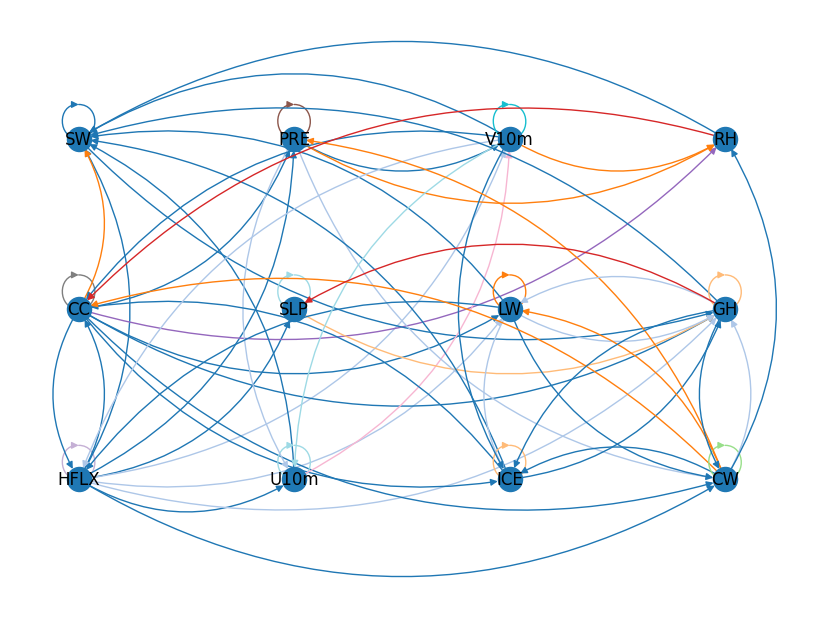

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G_2d_s1, pos_2d_s1, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
pred_graph_s1

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.],
       [0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
true_graph

array([[0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [ ]:
np.savetxt('proposed-summary-adj-mat.csv', pred_graph_s1, delimiter=",")

In [ ]:
cdt.metrics.SHD(true_graph, pred_graph_s1) #8, linear, tanh, 30

63.0

In [ ]:
true_values = true_graph
predictions = pred_graph_s1

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.5625, Precision: 0.36507936507936506, Recall: 0.5, FDR: 0.6349206349206349, F1 Score: 0.4220183486238532


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1), normalize=True)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("F1-Score:", f1)

Accuracy: 0.625
Precision: 0.43333333333333335
Recall (Sensitivity): 0.5652173913043478
F1-Score: 0.49056603773584906


# Ground Truth

In [ ]:
['HFLX','CC','SW','U10m','SLP', 'PRE','ICE', 'LW','V10m','CW','GH','RH']
   0      1    2     3      4.    5.    6.     7.    8.    9.   10.  11

In [ ]:
true_graph = np.zeros((12,12))
true_graph[0,5]=1
true_graph[0,6]=1
true_graph[0,9]=1
true_graph[0,1]=1
true_graph[0,4]=1
true_graph[0,3]=1
true_graph[0,8]=1

true_graph[1,2]=1
true_graph[1,7]=1
true_graph[1,11]=1
true_graph[1,0]=1

true_graph[2,6]=1

true_graph[3,6]=1
true_graph[3,0]=1

true_graph[4,3]=1
true_graph[4,8]=1
true_graph[4,0]=1
true_graph[4,6]=1
true_graph[4,10]=1
true_graph[4,11]=1

true_graph[5,9]=1
true_graph[5,1]=1
true_graph[5,6]=1
true_graph[5,11]=1
true_graph[5,0]=1

true_graph[6,0]=1
true_graph[6,2]=1
true_graph[6,7]=1
true_graph[6,4]=1
true_graph[6,3]=1
true_graph[6,8]=1

true_graph[7,6]=1

true_graph[8,0]=1
true_graph[8,6]=1

true_graph[9,0]=1
true_graph[9,2]=1
true_graph[9,7]=1
true_graph[9,11]=1
true_graph[9,5]=1

true_graph[10,11]=1
true_graph[10,4]=1
true_graph[10,7]=1

true_graph[11,5]=1
true_graph[11,7]=1
true_graph[11,1]=1
true_graph[11,9]=1

true_graph

array([[0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [ ]:
#total = np.sum(true_graph, weights=true_graph>0)
total = np.sum(true_graph[ np.where( true_graph > 0 )])
total

46.0

In [ ]:
import networkx as nx
G_2d_s1 = nx.DiGraph()

#nodes_2d_s = ['HFLX', 'SW', 'LW', 'SLP', 'PRE', 'RH', 'U10m', 'V10m', 'ICE', 'CC','CW', 'GH']
#nodes_r_2d_s = ['HFLX', 'SW', 'LW', 'SLP', 'PRE', 'RH', 'U10m', 'V10m', 'ICE', 'CC','CW', 'GH']
nodes_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
nodes_r_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
edges_2d_s1 = []
pred_graph_s1 = np.zeros((12,12))

In [ ]:
for i in range (0, 12):
  G_2d_s1.add_node(nodes_2d_s[i],pos=(int(i/3)+1,(i%3)+1))

In [ ]:
for i in range(0, 12):
  for j in range (0, 12):
    if true_graph[i,j] > 0.3:
      col = np.round(true_graph[i,j], 2)
      #print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=col)
      pred_graph_s1[i, j]=1


In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'HFLX': (1, 1),
 'CC': (1, 2),
 'SW': (1, 3),
 'U10m': (2, 1),
 'SLP': (2, 2),
 'PRE': (2, 3),
 'ICE': (3, 1),
 'LW': (3, 2),
 'V10m': (3, 3),
 'CW': (4, 1),
 'GH': (4, 2),
 'RH': (4, 3)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


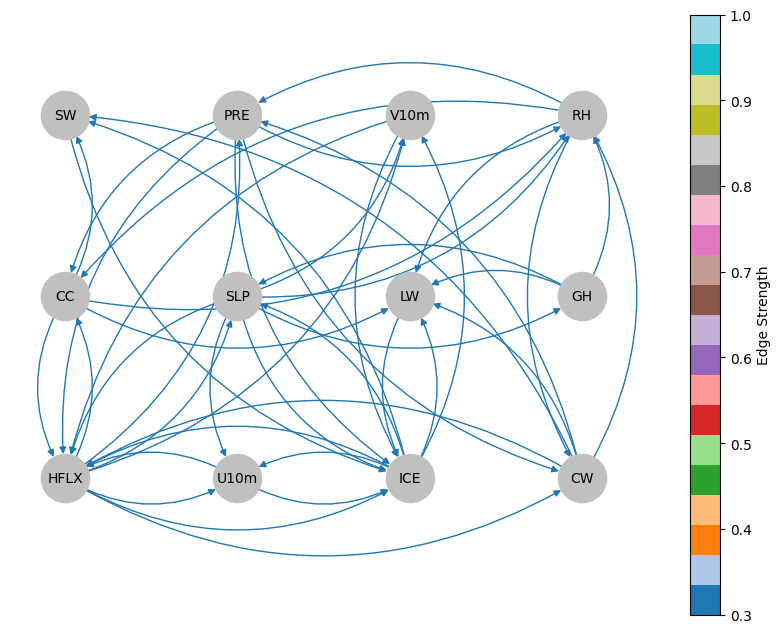

In [ ]:
import matplotlib.pyplot as plt # new
import matplotlib as mpl

plt.figure(figsize=(8, 6))
nx.draw(G_2d_s1, pos_2d_s1,  edge_cmap= plt.cm.tab20,  #cmap = plt.get_cmap('jet'),
        font_size=10, node_size=1200, node_color='#c0c0c0', #[30,30,30,30,30],
        edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.3, 1), cmap=plt.cm.tab20),
              orientation='vertical', label='Edge Strength')
plt.show()